In [ ]:
# Installing the tensor flow module
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 54.2 MB/s 
     |████████████████████████████████| 6.0 MB 65.4 MB/s 
     |████████████████████████████████| 439 kB 79.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9625788895390921982
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10877894602422470788
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
! cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         7581332 kB
MemAvailable:   11281468 kB
Buffers:          339396 kB
Cached:          3250876 kB
SwapCached:            0 kB
Active:           638404 kB
Inactive:        4706384 kB
Active(anon):        896 kB
Inactive(anon):  1457100 kB
Active(file):     637508 kB
Inactive(file):  3249284 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               376 kB
Writeback:             0 kB
AnonPages:       1754520 kB
Mapped:           665920 kB
Shmem:             11424 kB
KReclaimable:     109588 kB
Slab:             151652 kB
SReclaimable:     109588 kB
SUnreclaim:        42064 kB
KernelStack:        4368 kB
PageTables:        29052 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    3414600 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52848 kB
VmallocChunk:          0 kB
Percpu:          

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.174
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Divide the dataset into dependent and independent features
X = df.drop(columns=["Exited","RowNumber","CustomerId","Surname"])
y=df["Exited"]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
transformer=ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first'),["Geography","Gender"],)
],remainder='passthrough')

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
X=pd.DataFrame(transformer.fit_transform(X),columns=['Germany','Spain','Male','CreditScore','Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [ ]:
X.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
scale.fit(X_train)

StandardScaler()

In [ ]:
X_test

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,1.0,0.0,0.0,597.0,35.0,8.0,131101.04,1.0,1.0,1.0,192852.67
898,0.0,0.0,0.0,523.0,40.0,2.0,102967.41,1.0,1.0,0.0,128702.10
2398,0.0,1.0,0.0,706.0,42.0,8.0,95386.82,1.0,1.0,1.0,75732.25
5906,0.0,0.0,1.0,788.0,32.0,4.0,112079.58,1.0,0.0,0.0,89368.59
2343,1.0,0.0,1.0,706.0,38.0,5.0,163034.82,2.0,1.0,1.0,135662.17
...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,625.0,24.0,1.0,0.00,2.0,1.0,1.0,180969.55
2899,0.0,0.0,0.0,586.0,35.0,7.0,0.00,2.0,1.0,0.0,70760.69
9549,0.0,1.0,1.0,578.0,36.0,1.0,157267.95,2.0,1.0,0.0,141533.19
2740,1.0,0.0,1.0,650.0,34.0,4.0,142393.11,1.0,1.0,1.0,11276.48


In [ ]:
X_train=pd.DataFrame(scale.transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scale.transform(X_test), columns=X_test.columns)

In [ ]:
# Tensorflow is from google 
# Keras is wrapper which uses Tensorflow api now it is integrated from version 2.0

# Sequential layer:- It means the entire neural network as a block and can do forward and backword propogation
# Dense layer:- It is used to create neurons in the hidden layers, Input layers, Output layers
# Activation functions LeakyReLU, PReLU, ELU, ReLU :-  we are using activitation function in the hidden layer
# Dropout layer :- It is just like a regularization when we use it the neurons go dead or removed

In [ ]:
# ANN using tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Lets initilize the ANN
clf=Sequential()

In [ ]:
# Adding the input Layer
# Because we have 11 columns we use units as 11
clf.add(Dense(units=11, activation="relu"))

In [ ]:
# Adding the first hidden layer
clf.add(Dense(units=9, activation="relu"))
clf.add(Dropout(0.3))

In [ ]:
# Adding the second hidden layer
clf.add(Dense(units=5, activation="relu"))
clf.add(Dropout(0.3))

In [ ]:
# Adding the output layer
clf.add(Dense(units=1, activation="sigmoid"))

In [ ]:
# from keras.optimizers import learning_rate_schedule

import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
clf.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Early stopping
# When the accuracy is not increaing then training will stop automatically 

In [ ]:

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=25,
    verbose=2,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
model_history = clf.fit(X_train, y_train, validation_split = 0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4008 - accuracy: 0.8354 - val_loss: 0.3717 - val_accuracy: 0.8516
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3650 - accuracy: 0.8574 - val_loss: 0.3712 - val_accuracy: 0.8504
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3566 - accuracy: 0.8528 - val_loss: 0.3771 - val_accuracy: 0.8554
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3542 - accuracy: 0.8586 - val_loss: 0.3775 - val_accuracy: 0.8519
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3539 - accuracy: 0.8619 - val_loss: 0.3721 - val_accuracy: 0.8489
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3484 - accuracy: 0.8608 - val_loss: 0.3694 - val_accuracy: 0.8360
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3542 - accuracy: 0.8636 - val_loss: 0.3665 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

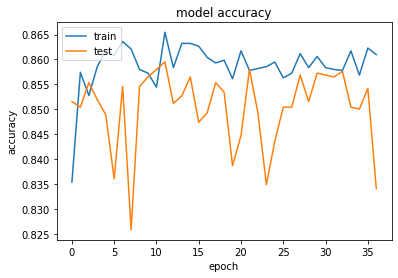

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

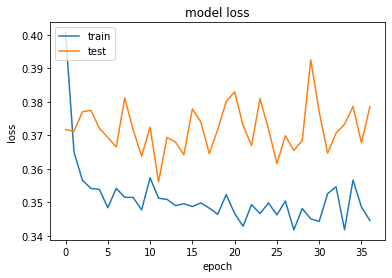

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#  Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1423,  172],
       [ 150,  255]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.839

In [ ]:
# get the weights 
clf.get_weights()

[array([[ 1.1293725 , -1.8186525 , -1.0499166 ,  0.09796699, -2.3541489 ,
         -0.34106082,  0.03008814, -4.553103  , -0.4288558 ,  1.049517  ,
         -0.75313306],
        [-1.7350245 , -0.9654793 ,  0.8220832 ,  0.06731153, -0.7574303 ,
         -0.20103076, -0.03408718, -0.8440633 , -0.7125183 , -0.78991896,
         -4.213023  ],
        [ 2.626314  , -1.7442552 ,  0.81340134, -1.6984764 ,  0.59152806,
          0.54818606, -0.1599115 ,  1.5669818 ,  2.554084  , -0.7100739 ,
         -0.47023508],
        [-0.5094056 , -1.8272828 ,  2.5773299 ,  0.08218324,  0.06013441,
         -0.3697081 , -0.01543005, -0.4252364 , -0.5220064 , -0.62791187,
         -0.5278706 ],
        [-3.5636296 , -0.8681747 , -1.5134757 , -4.241961  ,  0.78515893,
          3.632255  , -1.5352505 , -3.8256385 , -1.3114988 ,  0.81809485,
         -4.118487  ],
        [ 1.0851947 ,  1.3256838 , -0.8627661 ,  0.22353466, -0.25645444,
          0.7212119 , -0.10465723,  1.4502426 ,  1.3197671 ,  0.4100694